# LR을 이용한 활용한 주가예측 코드

In [ ]:
!pip install finance-datareader
!pip install -U finance-datareader # 업데이트

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 한국거래소에 상장된 모든 종목 리스트 가져오기
import FinanceDataReader as fdr
df_krx = fdr.StockListing('KRX')
df_krx.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


In [ ]:
df = fdr.DataReader('036570','2020-01-01', '2022-04-12') # NCsoft 주가를 2020년부터 현시점까지 가져온다

In [ ]:
df = df.fillna(0)
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,542000,545000,539000,541000,40246,0.000000
2020-01-03,547000,568000,542000,565000,112404,0.044362
2020-01-06,562000,587000,562000,579000,107006,0.024779
2020-01-07,583000,596000,574000,594000,84378,0.025907
2020-01-08,587000,604000,584000,604000,109267,0.016835
...,...,...,...,...,...,...
2022-04-06,475000,483500,469000,474000,96750,-0.012500
2022-04-07,469000,471500,462000,462000,103079,-0.025316
2022-04-08,462500,466500,453500,458000,87055,-0.008658


In [ ]:
import matplotlib.pyplot as plt

(array([737425., 737516., 737607., 737699., 737791., 737881., 737972.,
        738064., 738156., 738246.]),
 <a list of 10 Text major ticklabel objects>)

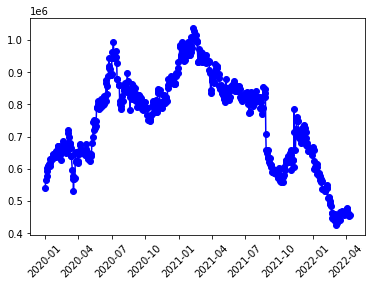

In [ ]:
plt.plot(df['Close'], 'bo-')
plt.xticks(rotation=45)

## 학습데이터
 - input: Volume
 - output: changes/ 0,1

In [ ]:
df["Change_binary"] = df["Change"] > 0.0
df["Change_01"] = df["Change_binary"].astype(int).to_numpy().tolist()
train = df[["Volume", "Change"]].to_numpy().tolist()

In [ ]:
df

,Open,High,Low,Close,Volume,Change,Change_binary,Change_01
Date,,,,,,,,
2020-01-02,542000,545000,539000,541000,40246,0.000000,False,0
2020-01-03,547000,568000,542000,565000,112404,0.044362,True,1
2020-01-06,562000,587000,562000,579000,107006,0.024779,True,1
2020-01-07,583000,596000,574000,594000,84378,0.025907,True,1
2020-01-08,587000,604000,584000,604000,109267,0.016835,True,1
...,...,...,...,...,...,...,...,...
2022-04-06,475000,483500,469000,474000,96750,-0.012500,False,0
2022-04-07,469000,471500,462000,462000,103079,-0.025316,False,0
2022-04-08,462500,466500,453500,458000,87055,-0.008658,False,0


In [ ]:
## train/test split 
from sklearn.model_selection import train_test_split
train, test = train_test_split(train)
train

[[62526.0, -0.020642201834862428],
 [125308.0, 0.008319467554076532],
 [96478.0, -0.01908396946564883],
 [106253.0, -0.002525252525252486],
 [236723.0, -0.013266998341625258],
 [65547.0, -0.020706455542021884],
 [112704.0, 0.0011148272017837968],
 [206859.0, 0.01916572717023679],
 [352625.0, 0.05507246376811592],
 [49132.0, 0.0],
 [553567.0, 0.05052264808362361],
 [158520.0, -0.0165929203539823],
 [69582.0, -0.0012674271229404788],
 [90061.0, -0.013859275053304865],
 [80586.0, 0.007680491551459223],
 [117007.0, 0.022245762711864403],
 [84776.0, 0.032911392405063244],
 [161574.0, 0.0032223415682062218],
 [141506.0, 0.026589595375722475],
 [85534.0, 0.0160160160160161],
 [88009.0, -0.015763546798029604],
 [72835.0, -0.008000000000000007],
 [196509.0, -0.005328596802841923],
 [78708.0, 0.0],
 [105016.0, 0.012213740458015376],
 [213974.0, -0.03165298944900352],
 [106457.0, -0.01777777777777778],
 [78286.0, 0.025575447570332477],
 [52468.0, 0.011428571428571344],
 [229201.0, -0.015691868758

In [ ]:
import numpy as np
train_np = np.array(train)
test_np = np.array(test)

In [ ]:
train_input = train_np[:, 0].reshape(-1,1)
train_target = train_np[:, 1]
test_input = test_np[:, 0].reshape(-1,1)
test_target = test_np[:, 1]

In [ ]:
## 정규화 적용
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(train_scaled, train_target)

LinearRegression()

In [ ]:
lr.score(train_scaled, train_target)

0.0897176054332679

In [ ]:
lr.score(test_scaled, test_target)

-0.2513911327869198

In [ ]:
lr.predict(ss.transform([[152405.0]]))

array([0.00092105])